In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

rng=np.random

In [0]:
# parameters
learning_rate=0.01
training_epochs=1000
display_step=50

In [0]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [0]:
# tf graph input
X=tf.placeholder("float")
Y=tf.placeholder("float")

# set weights
W=tf.Variable(rng.randn(),name="weight")
b=tf.Variable(rng.randn(),name="bias")

In [0]:
# construct linear model
pred=tf.add(tf.multiply(X,W),b)

In [7]:
# mean squared error
cost=tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)

# gradient descent
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

W0810 18:28:20.946553 140581025720192 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1205: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#initialize the variables
init=tf.global_variables_initializer()

('Epoch 0050', 'cost 0.000818', 'W', 0.2738239, 'B', 0.62959945)
('Epoch 0050', 'cost 0.024597', 'W', 0.2762195, 'B', 0.6301439)
('Epoch 0050', 'cost 0.000100', 'W', 0.27602747, 'B', 0.63010895)
('Epoch 0050', 'cost 0.013946', 'W', 0.278821, 'B', 0.6305253)
('Epoch 0050', 'cost 0.020936', 'W', 0.27527955, 'B', 0.63001424)
('Epoch 0050', 'cost 0.001202', 'W', 0.27477846, 'B', 0.629894)
('Epoch 0050', 'cost 0.000063', 'W', 0.2750606, 'B', 0.62992287)
('Epoch 0050', 'cost 0.001981', 'W', 0.27602664, 'B', 0.63007915)
('Epoch 0050', 'cost 0.001044', 'W', 0.27515548, 'B', 0.62996435)
('Epoch 0050', 'cost 0.000001', 'W', 0.2751488, 'B', 0.62996125)
('Epoch 0050', 'cost 0.001864', 'W', 0.2762235, 'B', 0.63011384)
('Epoch 0050', 'cost 0.000542', 'W', 0.27529776, 'B', 0.63002807)
('Epoch 0050', 'cost 0.005567', 'W', 0.27391425, 'B', 0.62976766)
('Epoch 0050', 'cost 0.000191', 'W', 0.27430817, 'B', 0.6298169)
('Epoch 0050', 'cost 0.001619', 'W', 0.27510387, 'B', 0.6299576)
('Epoch 0050', 'cost 0.

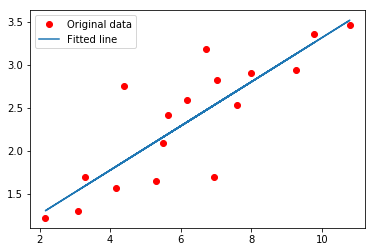

In [9]:
with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(training_epochs):
    for (x,y) in zip(train_X, train_Y):
      sess.run(optimizer, feed_dict={X:x, Y:y})
      
      if (epoch+1)%display_step==0:
        c=sess.run(cost, feed_dict={X:x, Y:y})
        print("Epoch %04d"%(epoch+1), "cost %f"%c,"W",sess.run(W), "B",sess.run(b) )
        
  print("optimization finished")
  training_cost=sess.run(cost, feed_dict={X:train_X, Y:train_Y})
  print("Training cost", training_cost, "W=", sess.run(W), "b=", sess.run(b))
  
  plt.plot(train_X, train_Y, 'ro',label="Original data")
  plt.plot(train_X, sess.run(W)*train_X+ sess.run(b), label="Fitted line")
  plt.legend()
  plt.show()